In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
MBTI = pd.read_csv('/content/drive/MyDrive/final_proj/dataset/df_text_cleaned_na.csv',encoding='UTF-8')
MBTI.head()

,text,mbti
0,애칭 어떻게 부르셨는지 알려주세요,intj
1,나만 남자친구랑 데이트 생각하는 거 같고 어찌나 서운하던지 근데 또 집에 가면 편해...,infp
2,istj와 isfj는 알파벳 한 끗 차이인데 istj이시면서 t와 f가 거의 비슷한...,entp
3,잇디 제분들 직장에서 수다떨기 좋아하시나요?,isfj
4,estj 남 entj여 인 분들 연애 어떻게 하시고 계시나요? 사귄 지 얼마 안 됐...,entj


In [ ]:
MBTI.columns = ['posts','mbti']
MBTI.head()

,posts,mbti
0,애칭 어떻게 부르셨는지 알려주세요,intj
1,나만 남자친구랑 데이트 생각하는 거 같고 어찌나 서운하던지 근데 또 집에 가면 편해...,infp
2,istj와 isfj는 알파벳 한 끗 차이인데 istj이시면서 t와 f가 거의 비슷한...,entp
3,잇디 제분들 직장에서 수다떨기 좋아하시나요?,isfj
4,estj 남 entj여 인 분들 연애 어떻게 하시고 계시나요? 사귄 지 얼마 안 됐...,entj


In [ ]:
#Inspection and Cleaning

In [ ]:
MBTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122080 entries, 0 to 122079
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   122080 non-null  object
 1   mbti    122080 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB


In [ ]:
MBTI = MBTI.rename(columns={'mbti':'Personality Type'})

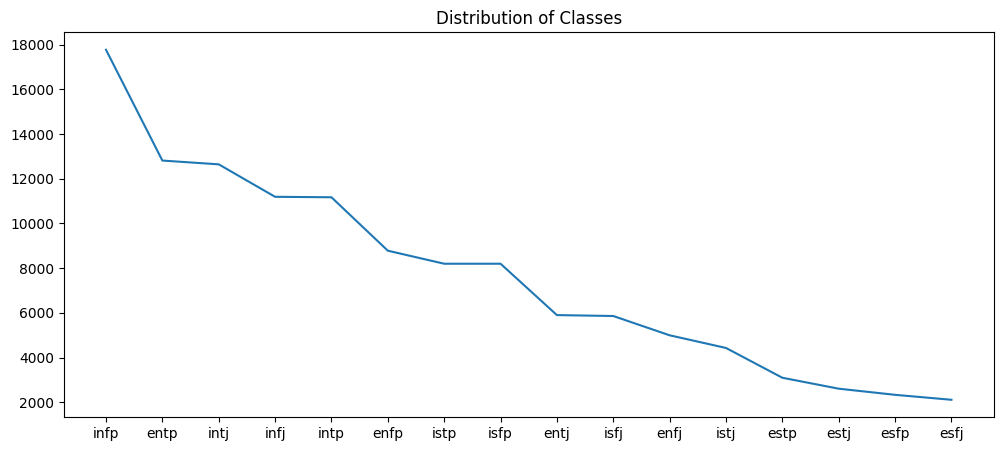

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(MBTI['Personality Type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [ ]:
#Some amount of class imbalance found.

In [ ]:
MBTI['Length'] = MBTI['posts'].apply(lambda x: len(x.split(' ')))
MBTI['Length'].describe()

count    122080.000000
mean         17.414179
std          14.337512
min           1.000000
25%           7.000000
50%          13.000000
75%          23.000000
max         142.000000
Name: Length, dtype: float64

In [ ]:
MBTI.head()

,posts,Personality Type,Length
0,애칭 어떻게 부르셨는지 알려주세요,intj,5
1,나만 남자친구랑 데이트 생각하는 거 같고 어찌나 서운하던지 근데 또 집에 가면 편해...,infp,68
2,istj와 isfj는 알파벳 한 끗 차이인데 istj이시면서 t와 f가 거의 비슷한...,entp,25
3,잇디 제분들 직장에서 수다떨기 좋아하시나요?,isfj,6
4,estj 남 entj여 인 분들 연애 어떻게 하시고 계시나요? 사귄 지 얼마 안 됐...,entj,22


In [ ]:
#As we can see the length of the sentences are not exactly 500 each.

In [ ]:
#We will now get a list of all the words in all the posts.
#We will take a sample of the data since there are a lot of words present.

In [ ]:
MBTI_Pred = MBTI.sample(frac=0.3)
len(MBTI_Pred)

36624

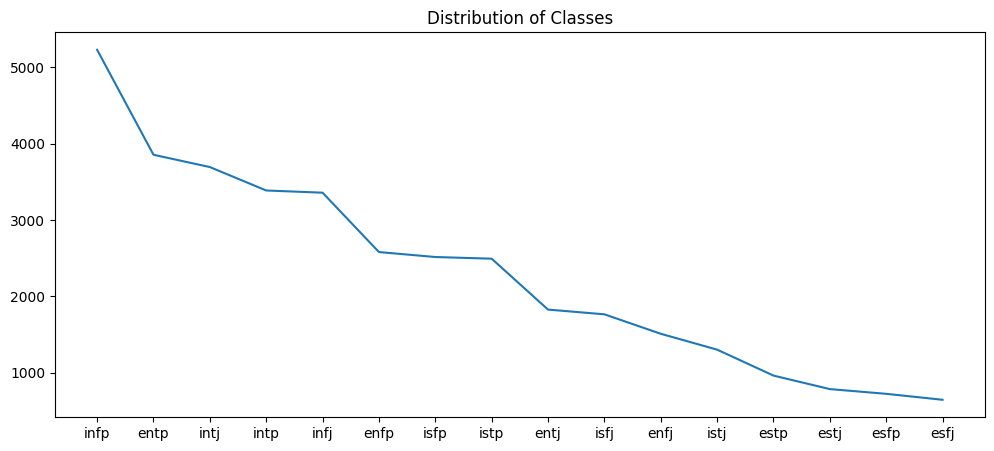

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(MBTI_Pred['Personality Type'].value_counts())
plt.title('Distribution of Classes')
plt.show()

In [ ]:
Words = list()
for i in list(MBTI_Pred['posts']):
    for j in i.split(' '):
        Words.append(j)

In [ ]:
Words

['그리고',
 '요즘은',
 '타인에게',
 '간접적으로라도',
 '해가',
 '가지',
 '않도록',
 '스스로',
 '너무',
 '자극적인',
 '영상은',
 '끊고',
 '있어요.',
 '',
 '뇌가',
 '바뀌는',
 '기분이',
 '들어서요.',
 '약한',
 '수준으로',
 '몇',
 '종류의',
 '도착증을',
 '가지고는',
 '있지만',
 '남에게',
 '피해가',
 '안',
 '가는',
 '수준으로',
 '바뀌거나',
 '피해가',
 '안',
 '가고',
 '죄책감',
 '없이',
 '만족을',
 '느낄',
 '수',
 '있는',
 '방향으로',
 '잘',
 '다듬어지고',
 '컨트롤되고',
 '있어요.',
 '제가',
 '스스로',
 '이렇게',
 '조절할',
 '수',
 '있게',
 '되었다는',
 '점에서',
 '제',
 '자신이',
 '자랑스러워요.',
 '',
 '그러다',
 '치',
 '안',
 '무사하지',
 '못할',
 '듯',
 '',
 '저는',
 '히오스를',
 '하다가',
 '롤로',
 '넘어갔는데도',
 '롤이',
 '어려웠어요.',
 '',
 '롤',
 '특유의...',
 '',
 '무슨',
 '일하세요?',
 '전',
 '정말',
 '사회생활',
 '안',
 '맞아서',
 '퇴사하고',
 '싶네요',
 'ㅜㅠ',
 '',
 '저도',
 '계획',
 '세우고',
 '지켜질',
 '때',
 '너무',
 '행복해요',
 '',
 '',
 '페미에',
 '대해선',
 '일단',
 '골치',
 '아픈',
 '게',
 '커요.',
 '',
 '한반도의',
 '이해관계와',
 '너무',
 '복잡하게',
 '얽혀있어서.',
 '',
 '객관적으로',
 '볼',
 '때',
 '그',
 '정도로',
 '스트레스',
 '받을',
 '일은',
 '아닌데~~~',
 '해야',
 '한다',
 '라는',
 '압박',
 '때문인지..',
 '고치고',
 '싶네',
 '',
 '융!!',
 '',
 '아무것도',
 '안',
 '할',
 '거예

In [ ]:
from collections import Counter

In [ ]:
Words_dic = Counter(Words)
Words_dic = pd.DataFrame({'Word':list(Words_dic.keys()),'Frequency':list(Words_dic.values())})
Words_dic.sort_values('Frequency',ascending=False,inplace=True)
Words_dic.set_index('Word',inplace=True)
print(len(Words_dic))
Words_dic.head()

133608


,Frequency
Word,
,66845
안,4912
거,4555
것,3440
잘,3148


In [ ]:
#Checking distribution of word frequencies

In [ ]:
Words_dic['Frequency'].describe()

count    133608.000000
mean          4.778292
std         187.722068
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       66845.000000
Name: Frequency, dtype: float64

In [ ]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    print(Words_dic['Frequency'].quantile(i))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
4.0


In [ ]:
for i in [0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]:
    print(Words_dic['Frequency'].quantile(i))

5.0
6.0
6.0
8.0
9.0
12.0
16.0
24.0
49.0


In [ ]:
#Using the top 1 quantile of words based on frequency.

In [ ]:
Words_dic = Words_dic[Words_dic.Frequency>49]
len(Words_dic)

1336

In [ ]:
Words_dic

,Frequency
Word,
,66845
안,4912
거,4555
것,3440
잘,3148
...,...
주말에,50
살면서,50
있기,50


In [ ]:
#We will now apply these words to the entire dataset based on their presence in the posts.

In [ ]:
Final_Words = list(Words_dic.index)
Final_Words

['',
 '안',
 '거',
 '것',
 '잘',
 '게',
 '저는',
 '너무',
 '수',
 'ㅋㅋ',
 '제가',
 '그',
 '저도',
 '그냥',
 '하는',
 '더',
 '있는',
 '때',
 '다',
 '전',
 '좀',
 '많이',
 '하고',
 '이',
 '한',
 '제',
 '그런',
 '다른',
 '건',
 '이런',
 '같아요',
 '같은',
 '할',
 '어떤',
 '진짜',
 '어떻게',
 'ㅎㅎ',
 '사람',
 '못',
 '저',
 '정말',
 '좋은',
 '왜',
 '내가',
 '걸',
 '근데',
 '없는',
 'ㅋㅋㅋ',
 '사람이',
 '내',
 'ㅠㅠ',
 '그래서',
 '보면',
 '그리고',
 '말',
 '또',
 '것도',
 '보고',
 '같아요.',
 '생각이',
 '하면',
 '이렇게',
 '엔',
 '좋아하는',
 '되는',
 '뭐',
 '그렇게',
 '엄청',
 '계속',
 '있을',
 '싶은',
 '같이',
 '혼자',
 '뭔가',
 '자기',
 '지금',
 '때문에',
 '있는데',
 '나',
 '아니면',
 '수도',
 '말을',
 '하는데',
 '다시',
 '맞는',
 '많은',
 '아닌',
 '-',
 '아',
 '해야',
 '보니',
 '생각',
 '일',
 '그래도',
 '글',
 '먼저',
 '줄',
 '중',
 '제일',
 '대한',
 'ㅠ',
 '해서',
 '몇',
 '가장',
 'infp',
 '될',
 ':',
 '어느',
 '자주',
 '정도',
 '마음이',
 '나는',
 '있고',
 '친구',
 '두',
 '거의',
 '있으면',
 '하지만',
 '알고',
 '해도',
 '혹시',
 '다들',
 '무슨',
 '해요',
 '항상',
 '사람을',
 '일단',
 '서로',
 '없이',
 '보는',
 '모든',
 '(',
 '사람은',
 '분들',
 '오늘',
 '번',
 '땐',
 '아니라',
 '요즘',
 '갑자기',
 '생각을',
 '사실',
 '대해',
 '있어요',
 '같은데'

In [ ]:
for i in Final_Words:
    MBTI[i] = MBTI['posts'].apply(lambda x: 1 if i in x.split(' ') else 0)
MBTI.drop(['Length','posts'],axis=1,inplace=True)
MBTI.head()

,Personality Type,,안,거,것,잘,게,저는,너무,수,...,읽는,사람들의,적어도,남을,아니다,주말에,살면서,있기,사람들에게,생일
0,intj,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,infp,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,entp,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,isfj,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,entj,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
len(MBTI)

122080

In [ ]:
#EDA

In [ ]:
#We will check which top 10 words for each of the different personality types.

In [48]:
MBTI_EDA = MBTI.groupby('Personality Type').mean()
MBTI_EDA = MBTI_EDA.transpose()
MBTI_EDA.head()

Personality Type,enfj,enfp,entj,entp,esfj,esfp,estj,estp,infj,infp,intj,intp,isfj,isfp,istj,istp
,1.000000,0.999089,0.999661,0.999766,1.000000,1.000000,1.000000,1.000000,0.999732,0.999100,0.999921,0.999463,1.000000,0.999878,0.999774,0.999756
안,0.114137,0.119590,0.108511,0.112611,0.112429,0.118884,0.121352,0.139302,0.107130,0.105109,0.107236,0.114672,0.119515,0.125778,0.144567,0.143955
거,0.111334,0.116401,0.104273,0.100983,0.122391,0.116309,0.111367,0.117324,0.101769,0.107079,0.097430,0.083341,0.116442,0.115408,0.116332,0.122728
것,0.091710,0.080866,0.086131,0.084049,0.101044,0.083691,0.087942,0.063672,0.094800,0.088116,0.076947,0.088891,0.087417,0.062096,0.091032,0.072344
잘,0.085903,0.081321,0.075958,0.078976,0.085863,0.075966,0.081797,0.075630,0.073624,0.074949,0.064215,0.066691,0.082124,0.075759,0.076576,0.075881


In [49]:
len(MBTI_EDA)

1336

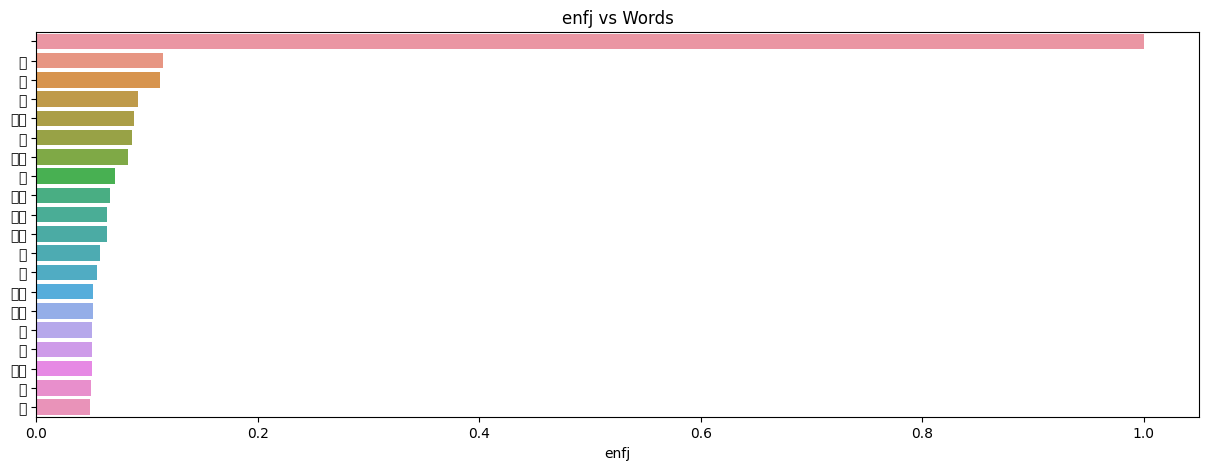

In [50]:
MBTI_EDA_ENFJ = MBTI_EDA[['enfj']]
MBTI_EDA_ENFJ.sort_values('enfj',ascending=False,inplace=True)
MBTI_EDA_ENFJ = MBTI_EDA_ENFJ.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ENFJ.enfj,y=MBTI_EDA_ENFJ.index)
plt.title('enfj vs Words')
plt.show()

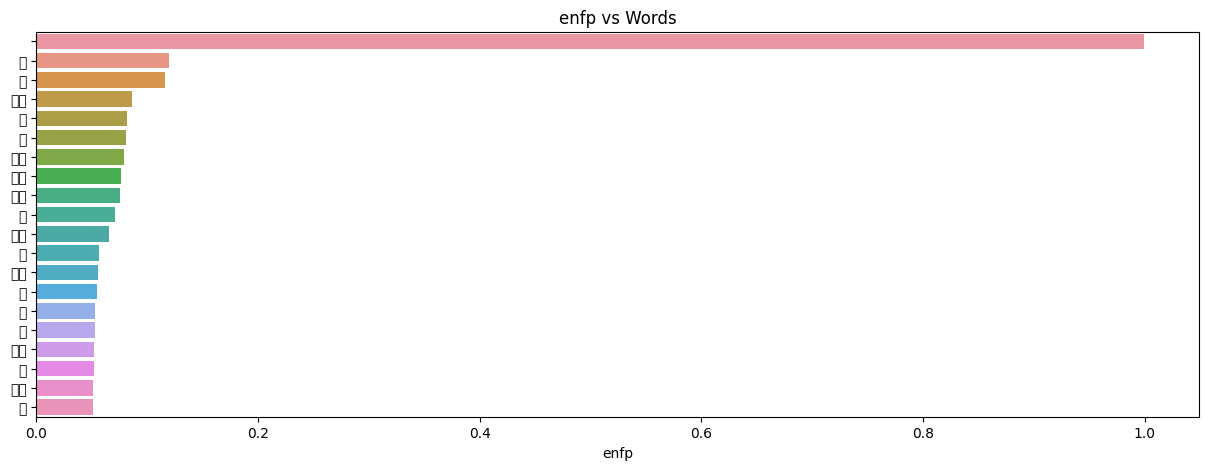

In [51]:
MBTI_EDA_ENFP = MBTI_EDA[['enfp']]
MBTI_EDA_ENFP.sort_values('enfp',ascending=False,inplace=True)
MBTI_EDA_ENFP = MBTI_EDA_ENFP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ENFP.enfp,y=MBTI_EDA_ENFP.index)
plt.title('enfp vs Words')
plt.show()

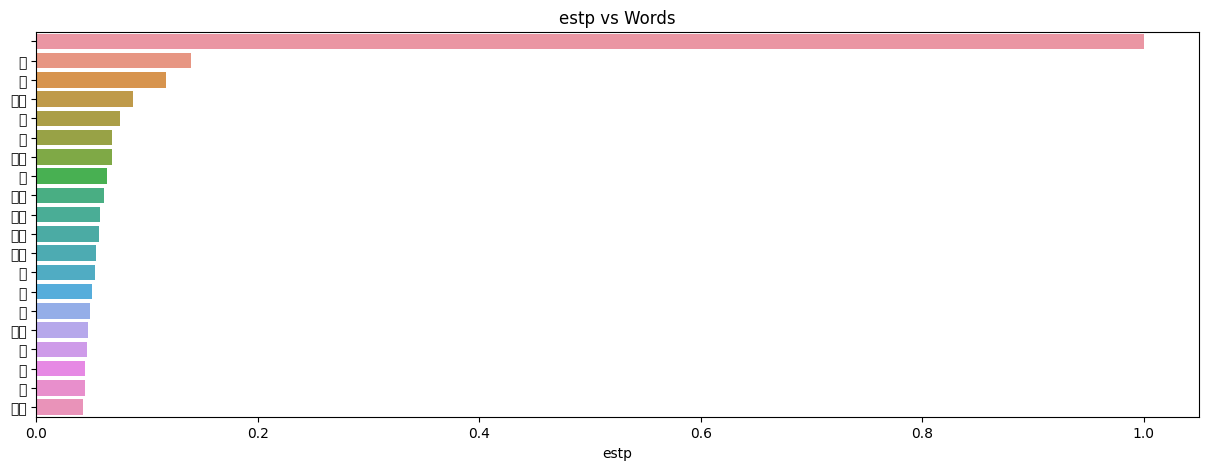

In [52]:
MBTI_EDA_ESTP = MBTI_EDA[['estp']]
MBTI_EDA_ESTP.sort_values('estp',ascending=False,inplace=True)
MBTI_EDA_ESTP = MBTI_EDA_ESTP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ESTP.estp,y=MBTI_EDA_ESTP.index)
plt.title('estp vs Words')
plt.show()

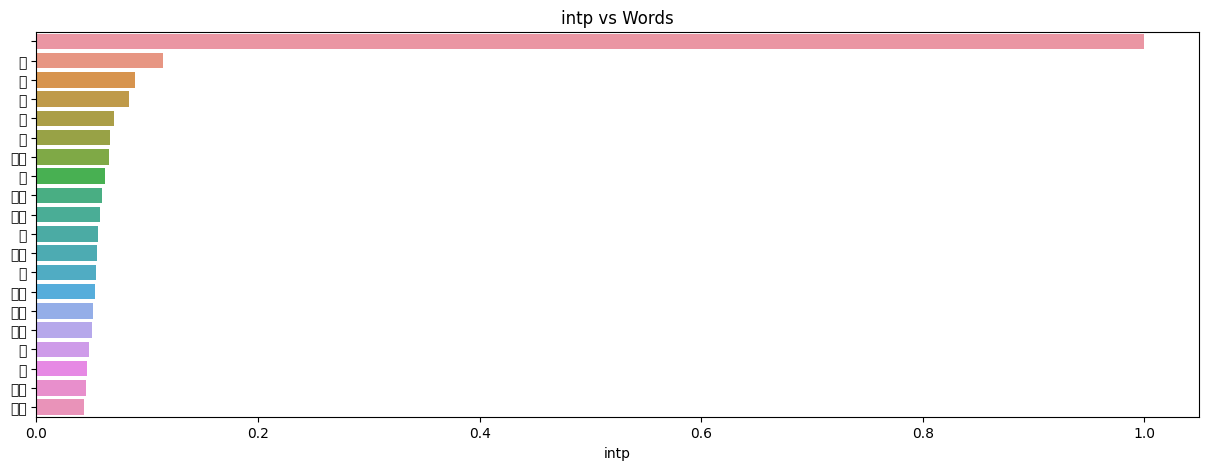

In [53]:
MBTI_EDA_INTP = MBTI_EDA[['intp']]
MBTI_EDA_INTP.sort_values('intp',ascending=False,inplace=True)
MBTI_EDA_INTP = MBTI_EDA_INTP.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_INTP.intp,y=MBTI_EDA_INTP.index)
plt.title('intp vs Words')
plt.show()

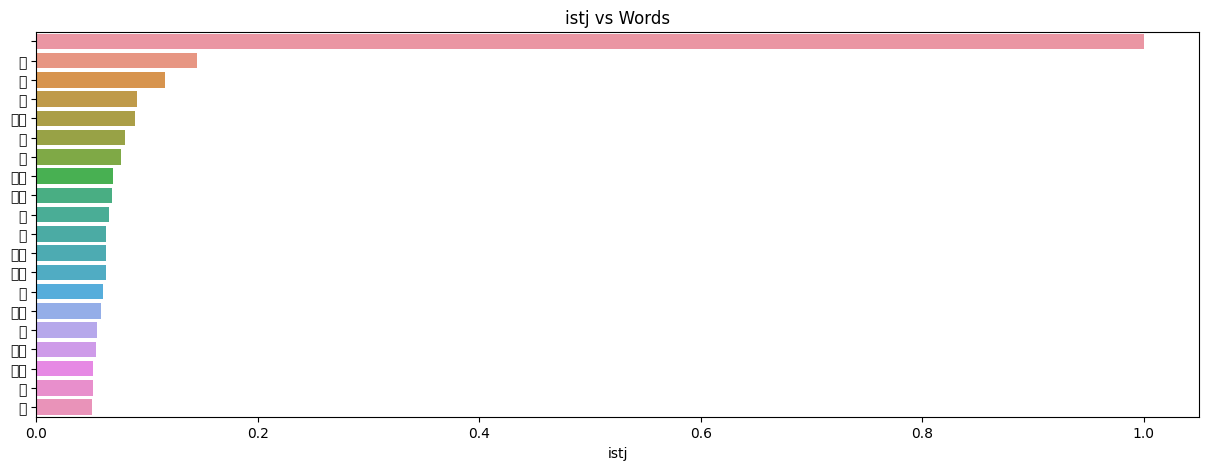

In [54]:
MBTI_EDA_ISTJ = MBTI_EDA[['istj']]
MBTI_EDA_ISTJ.sort_values('istj',ascending=False,inplace=True)
MBTI_EDA_ISTJ = MBTI_EDA_ISTJ.head(20)
plt.figure(figsize=(15,5))
sns.barplot(x=MBTI_EDA_ISTJ.istj,y=MBTI_EDA_ISTJ.index)
plt.title('istj vs Words')
plt.show()

In [ ]:
#We get a chart of the most probable words being used in the posts of some of the personality types.

In [ ]:
#Model building

In [ ]:
#Now we will build a model to predict each personality type from the words used.

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score

In [56]:
Personalities = ['infp','infj','intp','intj','entp','enfp','istp','isfp','entj','istj','enfj','isfj','estp','esfp','esfj','estj']
Feature_Importance = pd.DataFrame()

In [57]:
#Taking only a small sample of the data for training since we have a lot of data.

In [58]:
MBTI =  MBTI.sample(frac=0.05)#무작위 추

In [61]:
MBTI['Personality Type'].value_counts()

infp    941
intj    642
entp    639
infj    597
intp    573
enfp    422
isfp    390
istp    383
entj    293
isfj    282
enfj    245
istj    233
estp    143
esfp    119
estj    114
esfj     88
Name: Personality Type, dtype: int64

In [65]:
MBTI['Personality Type'].unique()

array([13,  1, 11, 10,  2,  9, 15,  8,  5,  3, 12,  0,  6, 14,  4,  7])

In [64]:
#다중분류로 수정
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
MBTI['Personality Type'] = encoder.fit_transform(MBTI['Personality Type'].values)

X = MBTI.drop('Personality Type',axis=1)
y = MBTI['Personality Type']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

Model = RandomForestClassifier(n_jobs=-1,random_state=100,class_weight='balanced')

params = {'n_estimators':[100],
            'max_depth':[3,5,7,10,12,15],
            'max_features':[0.05,0.1,0.15,0.2],
            'criterion':["gini","entropy"]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Model_best = grid_search.best_estimator_

y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)

print('Train Accuracy :',accuracy_score(y_train,y_train_pred))
print('Test Accuracy :',accuracy_score(y_test,y_test_pred))


Feature_Importance['Feature'] = X_train.columns
Feature_Importance['MBTI'] = Model_best.feature_importances_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Train Accuracy : 0.6303838951310862
Test Accuracy : 0.09934497816593886


In [66]:
Feature_Importance.head()

,Feature,infp,MBTI
0,,0.000000,0.000000
1,안,0.005993,0.017484
2,거,0.005791,0.017111
3,것,0.003998,0.010909
4,잘,0.005776,0.018560


In [67]:
MBTI

,Personality Type,,안,거,것,잘,게,저는,너무,수,...,읽는,사람들의,적어도,남을,아니다,주말에,살면서,있기,사람들에게,생일
33653,13,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18765,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15896,11,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104530,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104619,10,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40817,11,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8989,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90397,10,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#16개 class의 classification으로 진행했을 때 train 정확도가 63% test 정확도가 10%로 매우 낮게 측정됨
#머신러닝 분류기는 큰 효율을 보이지 않음

In [ ]:
# END FOR NOW #